In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import joblib

In [3]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [4]:
X,Y = mnist.data, mnist.target

X.shape
# 70000 black and white images, 28x28 pixels. Each pixel represents intesity, from 0 to 255

(70000, 784)

In [5]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

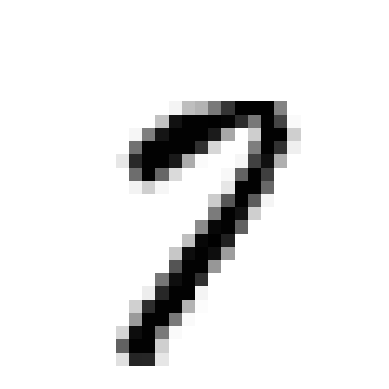

'7'

In [6]:
n = 9999

some_digit = X[n]
plot_digit(some_digit)
plt.show()

Y[n]

In [7]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [8]:
from sklearn.linear_model import SGDClassifier

# Binary classifier

Y_train_5 = (Y_train=='5')
Y_test_5 = (Y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train_5)



SGDClassifier(random_state=42)

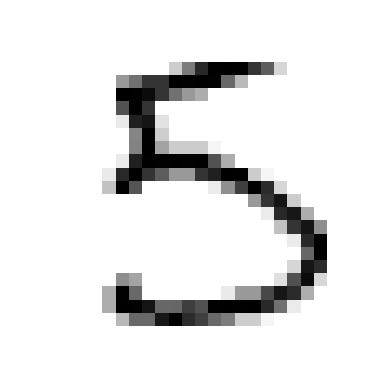

array([ True])

In [9]:
# Testing manually 
n = 15

some_digit = X_test[n]
plot_digit(some_digit)
plt.show()

Y_test[n]


X_test_reshaped = X_test[n].reshape(1, -1)
sgd_clf.predict(X_test_reshaped)

In [12]:
# cross val score measurement
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,Y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,Y_train_5)

cross_val_score(dummy_clf,X_train,Y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_5,cv=3)
cm = confusion_matrix(Y_train_5,Y_train_pred)

In [20]:
cm


# [true negative, false positive,
#  false negative, true positive]

# True negaitve - when something was classified correctly as negative
# False positive - when something was classified incorrectly as positive
# False negative - when something was classified incorrectly as negative
# True positive - when something was classified correclty as positive

# In a perfect model, values only in a major diagonal will be non-zero.

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)